In [10]:
import os
import random
import shutil
import json
from IPython.display import Audio

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split

import torchaudio
import torchaudio.transforms as transforms

import pytorch_lightning as pl

c:\Users\Asus\miniconda3\envs\majorproject\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
!pip install warmup_scheduler_pytorch

In [9]:
from warmup_scheduler_pytorch import WarmUpScheduler
from torch.optim.lr_scheduler import ConstantLR, LinearLR

WarmUpScheduler?

Init signature:
WarmUpScheduler(
    optimizer,
    lr_scheduler,
    warmup_steps: int,
    warmup_start_lr,
    len_loader: int = 1,
    warmup_mode: str = 'linear',
    verbose: bool = False,
)
Docstring:     
Warm up scheduler for changing learning rate at the beginning of training
Need to call WarmUpScheduler behind lr_scheduler instance in Pytorch.

Args:
    optimizer: Optimizer = Wrapped optimizer in Pytorch.
    lr_scheduler: _LRScheduler = Wrapped lr_scheduler in Pytorch.
    warmup_steps: int = The number of iterations for warmup_scheduler_pytorch.
    warmup_start_lr: list or tuple or float = The start learning rate of warmup_scheduler_pytorch
                                              for optimizer param_groups.
    len_loader: int = The length of dataloader.
    warmup_mode: str ='linear'.
    verbose: bool = If True, prints a message to stdout for each update.

Example:
    '>>> optimizer = torch.optim.SGD(model.parameters(), lr=0.1)                                   

In [14]:
from torch.optim import AdamW

optimizer = AdamW(model.parameters())
WarmUpScheduler(
    optimizer,
    LinearLR(optimizer=optimizer),
    warmup_steps=100,
    warmup_start_lr=1e-8,
    len_loader=99,
    warmup_mode='linear'
)

TypeError: LinearLR is not a lr_scheduler in pytorch

In [20]:
from torch.optim import AdamW
from torch.optim.lr_scheduler import StepLR
from warmup_scheduler_pytorch import WarmUpScheduler

# Assuming you have a model defined as `model`
optimizer = AdamW(model.parameters(), lr=3e-5)

# Define the LinearLR scheduler
lr_scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

# Define the WarmUpScheduler
warmup_scheduler = WarmUpScheduler(optimizer, lr_scheduler, warmup_steps=100, warmup_start_lr=1e-8, len_loader=99, warmup_mode='linear')



TypeError: StepLR is not a lr_scheduler in pytorch

In [8]:
LinearLR?

Init signature:
LinearLR(
    optimizer,
    start_factor=0.3333333333333333,
    end_factor=1.0,
    total_iters=5,
    last_epoch=-1,
    verbose='deprecated',
)
Docstring:     
Decays the learning rate of each parameter group by linearly changing small
multiplicative factor until the number of epoch reaches a pre-defined milestone: total_iters.
Notice that such decay can happen simultaneously with other changes to the learning rate
from outside this scheduler. When last_epoch=-1, sets initial lr as lr.

Args:
    optimizer (Optimizer): Wrapped optimizer.
    start_factor (float): The number we multiply learning rate in the first epoch.
        The multiplication factor changes towards end_factor in the following epochs.
        Default: 1./3.
    end_factor (float): The number we multiply learning rate at the end of linear changing
        process. Default: 1.0.
    total_iters (int): The number of iterations that multiplicative factor reaches to 1.
        Default: 5.
    last_epoc

In [37]:

warmup_steps = 100
training_steps = 1980
current_step = 11


if current_step < warmup_steps:  # current_step / warmup_steps * base_lr
    print(float(current_step / warmup_steps))
else:                                 # (num_training_steps - current_step) / (num_training_steps - warmup_steps) * base_lr
    print(1)


0.11


In [21]:
import torch

args = {
    "warmup_steps": 100,
    "training_steps": 
}
def warmup(current_step: int):
    if current_step < args.warmup_steps:  # current_step / warmup_steps * base_lr
        return float(current_step / args.warmup_steps)
    else:                                 # (num_training_steps - current_step) / (num_training_steps - warmup_steps) * base_lr
        return 1

lr_scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=warmup)

NameError: name 'args' is not defined

In [38]:
torch.optim.AdamW(
    params,
    lr=
)

Init signature:
torch.optim.AdamW(
    params: Union[Iterable[torch.Tensor], Iterable[Dict[str, Any]]],
    lr: Union[float, torch.Tensor] = 0.001,
    betas: Tuple[float, float] = (0.9, 0.999),
    eps: float = 1e-08,
    weight_decay: float = 0.01,
    amsgrad: bool = False,
    *,
    maximize: bool = False,
    foreach: Optional[bool] = None,
    capturable: bool = False,
    differentiable: bool = False,
    fused: Optional[bool] = None,
)
Docstring:     
Implements AdamW algorithm.

.. math::
   \begin{aligned}
        &\rule{110mm}{0.4pt}                                                                 \\
        &\textbf{input}      : \gamma \text{(lr)}, \: \beta_1, \beta_2
            \text{(betas)}, \: \theta_0 \text{(params)}, \: f(\theta) \text{(objective)},
            \: \epsilon \text{ (epsilon)}                                                    \\
        &\hspace{13mm}      \lambda \text{(weight decay)},  \: \textit{amsgrad},
            \: \textit{maximize}           

In [11]:
from transformers import Wav2Vec2Model

model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base")
layer_to_unfreeze = 10
for name, param in model.named_parameters():
    if name in ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']:
        param.requires_grad=True
    
    print(name, param.requires_grad)
for param in model.parameters():
    param.requires_grad = True
for name, param in model.named_parameters():
    if f"wav2vec2.encoder.layers.{layer_to_unfreeze}" in name:
        break
    else:
        param.requires_grad = False

c:\Users\Asus\miniconda3\envs\majorproject\Lib\site-packages\transformers\configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


masked_spec_embed True
feature_extractor.conv_layers.0.conv.weight True
feature_extractor.conv_layers.0.layer_norm.weight True
feature_extractor.conv_layers.0.layer_norm.bias True
feature_extractor.conv_layers.1.conv.weight True
feature_extractor.conv_layers.2.conv.weight True
feature_extractor.conv_layers.3.conv.weight True
feature_extractor.conv_layers.4.conv.weight True
feature_extractor.conv_layers.5.conv.weight True
feature_extractor.conv_layers.6.conv.weight True
feature_projection.layer_norm.weight True
feature_projection.layer_norm.bias True
feature_projection.projection.weight True
feature_projection.projection.bias True
encoder.pos_conv_embed.conv.bias True
encoder.pos_conv_embed.conv.parametrizations.weight.original0 True
encoder.pos_conv_embed.conv.parametrizations.weight.original1 True
encoder.layer_norm.weight True
encoder.layer_norm.bias True
encoder.layers.0.attention.k_proj.weight True
encoder.layers.0.attention.k_proj.bias True
encoder.layers.0.attention.v_proj.weight

In [11]:
model 

Wav2Vec2Model(
  (feature_extractor): Wav2Vec2FeatureEncoder(
    (conv_layers): ModuleList(
      (0): Wav2Vec2GroupNormConvLayer(
        (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
        (activation): GELUActivation()
        (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
      )
      (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
        (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
        (activation): GELUActivation()
      )
      (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
        (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
        (activation): GELUActivation()
      )
    )
  )
  (feature_projection): Wav2Vec2FeatureProjection(
    (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    (projection): Linear(in_features=512, out_features=768, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): Wav2Vec2Encoder(
    (pos_conv_embed): Wav2Vec2PositionalConvEmbedding(
  

In [2]:
pl.seed_everything(100)

Seed set to 100


100

In [2]:
class ConcordanceCorCoeff(nn.Module):

    def __init__(self):
        super(ConcordanceCorCoeff, self).__init__()
        self.mean = torch.mean
        self.var = torch.var
        self.sum = torch.sum
        self.sqrt = torch.sqrt
        self.std = torch.std
    def forward(self, prediction, ground_truth):
        mean_gt = self.mean (ground_truth, 0)
        mean_pred = self.mean (prediction, 0)
        var_gt = self.var (ground_truth, 0)
        var_pred = self.var (prediction, 0)
        v_pred = prediction - mean_pred
        v_gt = ground_truth - mean_gt
        cor = self.sum (v_pred * v_gt) / (self.sqrt(self.sum(v_pred ** 2)) * self.sqrt(self.sum(v_gt ** 2)))
        sd_gt = self.std(ground_truth)
        sd_pred = self.std(prediction)
        numerator = 2*cor*sd_gt*sd_pred
        denominator = var_gt+var_pred+(mean_gt-mean_pred)**2
        ccc = numerator/denominator
        return 1-ccc

In [11]:
ccc_loss = ConcordanceCorCoeff()
preds = torch.tensor([1., 0., 9, 6])
target = torch.tensor([3, -0.5, 2, 7])
loss = ccc_loss(preds, target)
print(loss)

tensor(0.6091)


In [3]:
kaggle_key_path = r"C:\Users\Asus\Downloads\kaggle.json"
dataset_path = r"E:\Desktop\StutterDetModel\data"

with open(kaggle_key_path, "r") as f:
    data = json.load(f)
os.environ["KAGGLE_USERNAME"] = data["username"]
os.environ["KAGGLE_KEY"] = data["key"]
del data

if not os.path.exists(os.path.join(dataset_path, r"clips\stuttering-clips\clips")):
    print("Data is downloaded from kaggle")
    import kaggle
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(
        "bschuss02/sep28k",
        path=dataset_path,
        unzip=True
    )
    print("Data was downloaded!")

    os.remove(os.path.join(dataset_path, "SEP-28k_episodes.csv"))
    os.remove(os.path.join(dataset_path, "SEP-28k_labels.csv"))
# os.remove(os.path.join(dataset_path, "sep28k.zip"))

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("The device is", device)

The device is cuda


In [3]:
SAMPLE_RATE = 16000
N_MFCC = 20
FRAME_LENGTH_DURATION_IN_MS = 25
FRAME_SKIP_DURATION_IN_MS = 12
N_FFT = 512
HOP_LENGTH = N_FFT // 2


N_OUTPUT_CLASS = 2

In [3]:
audio_transforms = transforms.MFCC(
    sample_rate=SAMPLE_RATE,
    n_mfcc=N_MFCC,
    melkwargs={"n_fft": N_FFT, "hop_length": HOP_LENGTH, "n_mels": 30}
)

NameError: name 'SAMPLE_RATE' is not defined

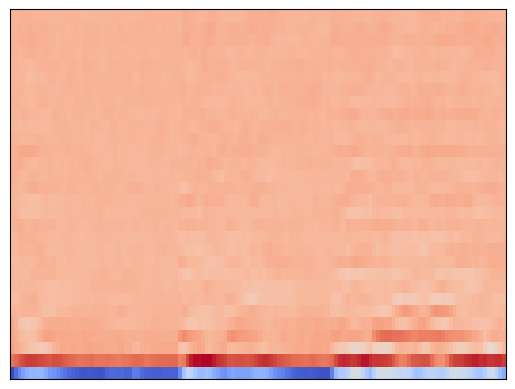

In [4]:
audio, sr = librosa.load(r'E:\Desktop\StutterDetModel\data\clips\stuttering-clips\clips\FluencyBank_010_5.wav')
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=30)
librosa.display.specshow(mfcc)
Audio(audio, rate=sr)

In [5]:
from transformers import AutoModelForAudioClassification, AutoFeatureExtractor, Wav2Vec2FeatureExtractor

feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/wav2vec2-base")
extractor = AutoFeatureExtractor.from_pretrained("facebook/wav2vec2-base")
model = AutoModelForAudioClassification.from_pretrained("facebook/wav2vec2-base")

c:\Users\Asus\miniconda3\envs\majorproject\Lib\site-packages\transformers\configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
feature_extractor

Wav2Vec2FeatureExtractor {
  "do_normalize": true,
  "feature_extractor_type": "Wav2Vec2FeatureExtractor",
  "feature_size": 1,
  "padding_side": "right",
  "padding_value": 0.0,
  "return_attention_mask": false,
  "sampling_rate": 16000
}

In [7]:
model

Wav2Vec2ForSequenceClassification(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)


In [8]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
    def forward(self, input_data):
        return input_data
    
model.projector = Identity()
model.classifier = Identity()

model

Wav2Vec2ForSequenceClassification(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)


In [9]:
audio.shape

(66150,)

In [105]:
model.dummy_inputs['input_ids'].shape

torch.Size([3, 5])

In [14]:
model = model.to("cuda")
extractor = extractor.to("cuda")

AttributeError: 'Wav2Vec2FeatureExtractor' object has no attribute 'to'

In [15]:
input_val = torch.ones(64, 48000).to("cuda")
model(torch.from_numpy(extractor(input_val, sampling_rate=16000).input_values[0])).logits.shape

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [63]:
extractor(input_val, sampling_rate=16000).input_values[0]

array([[ 0.02531145,  0.01285832, -0.00720172, ..., -0.47069132,
        -0.5576573 , -0.36077872]], dtype=float32)

In [33]:
audio.shape

(66150,)

In [59]:
extractor(audio, sampling_rate=16000)["input_values"][0].shape

(66150,)

In [44]:
from transformers import AutoModelForAudioClassification, AutoFeatureExtractor

# Load the model and feature extractor
extractor = AutoFeatureExtractor.from_pretrained("facebook/wav2vec2-base")
model = AutoModelForAudioClassification.from_pretrained("facebook/wav2vec2-base", num_labels=4)

# Determine the number of layers to freeze
layer_to_unfreeze = 11

for param in model.parameters():
    param.requires_grad = True

# Freeze the encoder layers
for name, param in model.named_parameters():
    if f"wav2vec2.encoder.layers.{layer_to_unfreeze}" in name:
        print("Breaking from ", name)
        break
    else:
        param.requires_grad = False

c:\Users\Asus\miniconda3\envs\majorproject\Lib\site-packages\transformers\configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Breaking from  wav2vec2.encoder.layers.9.attention.k_proj.weight


In [45]:
# Verify which layers are frozen
for name, param in model.named_parameters():
    print(name, param.requires_grad)

wav2vec2.masked_spec_embed False
wav2vec2.feature_extractor.conv_layers.0.conv.weight False
wav2vec2.feature_extractor.conv_layers.0.layer_norm.weight False
wav2vec2.feature_extractor.conv_layers.0.layer_norm.bias False
wav2vec2.feature_extractor.conv_layers.1.conv.weight False
wav2vec2.feature_extractor.conv_layers.2.conv.weight False
wav2vec2.feature_extractor.conv_layers.3.conv.weight False
wav2vec2.feature_extractor.conv_layers.4.conv.weight False
wav2vec2.feature_extractor.conv_layers.5.conv.weight False
wav2vec2.feature_extractor.conv_layers.6.conv.weight False
wav2vec2.feature_projection.layer_norm.weight False
wav2vec2.feature_projection.layer_norm.bias False
wav2vec2.feature_projection.projection.weight False
wav2vec2.feature_projection.projection.bias False
wav2vec2.encoder.pos_conv_embed.conv.bias False
wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0 False
wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1 False
wav2vec2.encoder.lay

In [31]:
model(np.expand_dims(audio, axis=0))

TypeError: conv1d() received an invalid combination of arguments - got (numpy.ndarray, Parameter, NoneType, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !Parameter!, !NoneType!, !tuple of (int,)!, !tuple of (int,)!, !tuple of (int,)!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !Parameter!, !NoneType!, !tuple of (int,)!, !tuple of (int,)!, !tuple of (int,)!, int)


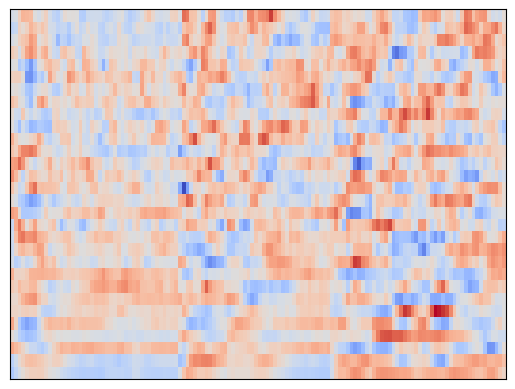

In [9]:
librosa.display.specshow(normalize_mfccs(mfcc))

In [7]:
def normalize_mfccs(mfcc):    
    eps = 2**-30
    rows, cols = mfcc.shape
    
    mean = np.mean(mfcc, axis=-1)[:, np.newaxis]
    mean_vec = np.tile(mean, (1, cols))

    normalized_mfccs = mfcc - mean_vec

    std = np.std(mfcc, axis=-1)[:, np.newaxis]
    std_vec = np.tile(std, (1, cols))

    normalized_mfccs = normalized_mfccs / (std_vec + eps)
    
    return normalized_mfccs

In [11]:
import scipy.stats as stats

print(mfcc.shape)
stats.zscore(mfcc, axis=1)

(30, 130)


3.3718226

1.0 0.0
1.0 -1.0


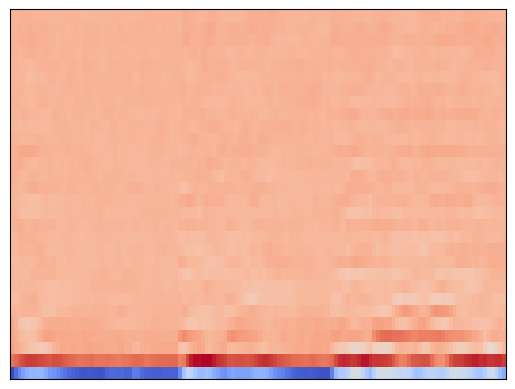

In [15]:
a = (mfcc - mfcc.min()) / (mfcc.max() - mfcc.min())
print(a.max(), a.min())
a = a * 2 - 1
print(a.max(), a.min())
librosa.display.specshow(a)

In [12]:
94*40

3760

In [5]:
def normalize_mfccs(mfccs):
    # Calculate the mean and standard deviation across the frames
    mean = np.mean(mfccs, axis=0)
    std_dev = np.std(mfccs, axis=0)
    print(mean.shape, std_dev.shape)
    
    # Normalize the MFCCs
    normalized_mfccs = (mfccs - mean) / std_dev
    
    return normalized_mfccs

(130,) (130,)


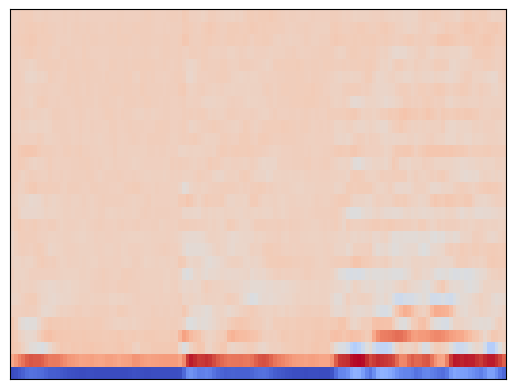

In [6]:
librosa.display.specshow(normalize_mfccs(mfcc))

In [45]:
class Sep28kDataset(Dataset):
    
    def __init__(self, data_dir, transforms, data_split_column="SEP12k", train=True, label_columns=['Prolongation'], sample_rate=16000):
        self.audio_path = os.path.join(data_dir, r"clips/stuttering-clips/clips")
        self.df_path = os.path.join(data_dir, "SEP28K.csv")
        self.label_columns = label_columns
        self.sample_rate = sample_rate
        self.num_samples = self.sample_rate * 3
        self.transforms = transforms.to(device)
        _df = pd.read_csv(self.df_path)

        if data_split_column == "SEP12k":
            if train:
                self.df = _df[_df["SEP12k"] == "train"]
            else:
                self.df = _df[_df["SEP12k"] != "train"]
        elif data_split_column == "SEP28k-E":
            if train:
                self.df = _df[_df["SEP28k-E"] == "train"]
            else:
                self.df = _df[_df["SEP28k-E"] == "test"]
        elif data_split_column == "SEP28k-T":
            if train:
                self.df = _df[_df["SEP28k-T"] == "train"]
            else:
                self.df = _df[_df["SEP28k-T"] == "test"]
        elif data_split_column == "SEP28k-D":
            if train:
                self.df = _df[_df["SEP28k-D"] == "dev"]
            else:
                self.df = _df[_df["SEP28k-D"] == "test"]
        else:
            print("Full SEP-28k dataset is being used.")
            self.df = _df

        self.df = self.df.reset_index(drop=True)


    def __getitem__(self, idx):
        file_path = os.path.join(self.audio_path, self.df.loc[idx, "FileName"])
        labels = torch.tensor(self.df.loc[idx, self.label_columns].to_numpy().astype(np.float32))

        try:
            signal, sr = torchaudio.load(file_path, format="wav", normalize=True)
        except RuntimeError:
            signal = torch.zeros((1, self.num_samples))
            sr = self.sample_rate
            labels = torch.zeros([len(self.label_columns)])

        labels = labels.to(device)
        signal = signal.to(device)
        
        out = self._resample_if_necessary(signal, sr)
        out = self._mix_channels_if_necessary(out)
        out = self._trim_excess_if_necessary(out)
        out = self._pad_if_necessary(out)
        out = self.transforms(out)
        out = out.squeeze()
        
        return signal, out, labels


    def __len__(self):
        return len(self.df)


    def _resample_if_necessary(self, signal, sr):
        if sr != self.sample_rate:
            resampler = transforms.Resample(sr, self.sample_rate).to(device)
            signal = resampler(signal)
        return signal


    def _mix_channels_if_necessary(self, signal):
        if signal.shape[0] != 1:
            signal = torch.mean(signal, dim=0, keepdim=True)
        return signal


    def _trim_excess_if_necessary(self, signal):
        if signal.shape[1] > self.num_samples:
            signal = signal[:, :self.num_samples]
        return signal


    def _pad_if_necessary(self, signal):
        if signal.shape[1] < self.num_samples:
            pad_len = self.num_samples - signal.shape[1]
            signal = torch.nn.functional.pad(signal, (0, pad_len))
        return signal


In [46]:
ds = Sep28kDataset(dataset_path, audio_transforms, label_columns=['Prolongation', 'Block', 'Repetition', 'Interjection'])

In [47]:
len(ds)

12465

In [50]:
from IPython.display import Audio

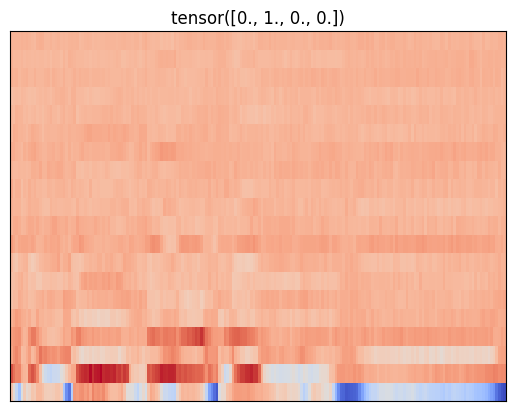

In [58]:
signal, mfcc, label = ds[random.randint(0, len(ds)-1)]
signal, mfcc, label = signal.cpu().numpy(), mfcc.cpu().numpy(), label.cpu()
librosa.display.specshow(mfcc)
plt.title(label)
plt.show()
Audio(signal, rate=16000)

In [28]:
class Sep28kDataModule(pl.LightningDataModule):
    
    def __init__(self, data_dir, transforms, num_workers=3, batch_size=32, train_split=0.8, data_split_column="SEP12k", label_columns=['Prolongation'], sample_rate=16000, *args, **kwargs):
        super(Sep28kDataModule, self).__init__(*args, **kwargs)
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.transforms = transforms
        self.data_split_column = data_split_column
        self.label_columns = label_columns
        self.sample_rate = sample_rate
        self.train_split = train_split
        self.num_workers = num_workers

    def prepare_data(self):
        pass
    
    def setup(self, stage : str):
        if stage == "fit":
            train_full_data = Sep28kDataset(
                data_dir=self.data_dir,
                transforms=self.transforms,
                data_split_column=self.data_split_column,
                train=True,
                label_columns=self.label_columns,
                sample_rate=self.sample_rate
            )
            train_full_data_len = len(train_full_data)
            train_len = int(train_full_data_len * self.train_split)
            val_len = train_full_data_len - train_len
            self.train, self.val = random_split(
                dataset=train_full_data,
                lengths=[train_len, val_len]
            )
        if stage == "test":
            self.test = Sep28kDataset(
                data_dir=self.data_dir,
                transforms=self.transforms,
                data_split_column=self.data_split_column,
                train=False,
                label_columns=self.label_columns,
                sample_rate=self.sample_rate
            )
        
        if stage == "predict":
            self.predict = Sep28kDataset(
                data_dir=self.data_dir,
                transforms=self.transforms,
                data_split_column=self.data_split_column,
                train=False,
                label_columns=self.label_columns,
                sample_rate=self.sample_rate
            )
    
    def train_dataloader(self):
        return DataLoader(
            dataset=self.train,
            batch_size=self.batch_size,
            shuffle=True,
            num_workers=self.num_workers,
            persistent_workers=True,
            # pin_memory=self.pin_memory
        )
    
    def val_dataloader(self):
        return DataLoader(
            dataset=self.val,
            batch_size=self.batch_size,
            shuffle=False
        )

    def test_dataloader(self):
        return DataLoader(
            dataset=self.test,
            batch_size=self.batch_size,
            shuffle=False
        )
    
    def predict_dataloader(self):
        return DataLoader(
            dataset=self.predict,
            batch_size=self.batch_size,
            shuffle=False
        )

In [29]:
# dm = Sep28kDataModule(dataset_path, audio_transforms, label_columns=['Prolongation', 'Block'])
# dm.prepare_data()
# dm.setup("fit")
# for x, y in dm.train_dataloader():
#     print(x.shape, x.max(), x.min())
#     break

In [30]:
class StatisticalPooling(nn.Module):
    def __init__(self):
        super(StatisticalPooling, self).__init__()

    def forward(self, x):
        mean = torch.mean(x, dim=-1)
        std = torch.std(x, dim=-1)
        return torch.cat((mean, std), dim=-1)

In [31]:
class StutterNetModel(pl.LightningModule):
    def __init__(
            self,
            dropout_rate=0,
            hidden_layers=[
                512, 
                512, 
                512, 
                512, 
                1500,
                512,
                512,
                N_OUTPUT_CLASS
            ],
            learning_rate=1e-4
    ):
        super(StutterNetModel, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv1d(
                in_channels=N_MFCC, 
                out_channels=hidden_layers[0],
                kernel_size=5,
                stride=1,
                padding=2,
                dilation=1
            ),
            nn.BatchNorm1d(num_features=hidden_layers[0]),
            nn.ReLU()
        )
        self.conv2 = nn.Sequential(
            nn.Conv1d(
                in_channels=hidden_layers[0], 
                out_channels=hidden_layers[1],
                kernel_size=3,
                stride=1,
                padding=2,
                dilation=2
            ),
            nn.BatchNorm1d(num_features=hidden_layers[1]),
            nn.ReLU()
        )
        self.conv3 = nn.Sequential(
            nn.Conv1d(
                in_channels=hidden_layers[1], 
                out_channels=hidden_layers[2],
                kernel_size=3,
                stride=1,
                padding=3,
                dilation=3
            ),
            nn.BatchNorm1d(num_features=hidden_layers[2]),
            nn.ReLU()
        )
        self.conv4 = nn.Sequential(
            nn.Conv1d(
                in_channels=hidden_layers[2], 
                out_channels=hidden_layers[3],
                kernel_size=1,
                stride=1,
            ),
            nn.BatchNorm1d(num_features=hidden_layers[3]),
            nn.ReLU()
        )
        self.conv5 = nn.Sequential(
            nn.Conv1d(
                in_channels=hidden_layers[3], 
                out_channels=hidden_layers[4],
                kernel_size=1,
                stride=1,
            ),
            nn.BatchNorm1d(num_features=hidden_layers[4]),
            nn.ReLU()
        )
        self.statspool = StatisticalPooling()
        self.fc = nn.Sequential(
            nn.Linear(
                in_features=hidden_layers[4]*2,
                out_features=hidden_layers[5],
            ),
            nn.BatchNorm1d(num_features=hidden_layers[5]),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(
                in_features=hidden_layers[5],
                out_features=hidden_layers[6],
            ),
            nn.BatchNorm1d(num_features=hidden_layers[6]),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(
                in_features=hidden_layers[6],
                out_features=hidden_layers[7],
            )
        )
        self.criterion = nn.BCEWithLogitsLoss()
        self.learning_rate = learning_rate

    def forward(self, input_data):
        out = self.conv1(input_data)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.conv5(out)
        out = self.statspool(out)
        out = self.fc(out)
        return out
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        pred = self(x)
        loss = self.criterion(pred, y)
        self.log("train_loss", loss, prog_bar=True)
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        pred = self(x)
        loss = self.criterion(pred, y)
        self.log("val_loss", loss, prog_bar=True)
        return loss
    
    def test_step(self, batch, batch_idx):
        x, y = batch
        pred = self(x)
        loss = self.criterion(pred, y)
        self.log("test_loss", loss, prog_bar=True)
        return loss
    
    def configure_optimizers(self):
        return torch.optim.Adagrad(
            self.parameters(),
            lr=self.learning_rate
        )


In [32]:
model = StutterNetModel(dropout_rate=0)
data = Sep28kDataModule(dataset_path, audio_transforms, label_columns=['Prolongation', 'Block'])

In [33]:
trainer = pl.Trainer(
    accelerator="gpu",
    max_epochs=10,
    callbacks=[pl.callbacks.LearningRateFinder()]
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [34]:
trainer.fit(model=model, datamodule=data)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [1]:
import pandas as pd

df = pd.read_csv(r"E:\Desktop\StutterDetModel\data\SEP-28k_balanced_nostutter.csv")
df.head()

,Unnamed: 0,SEP28k-E,Prolongation,Block,Interjection,FileName,NoStutter,Repetition
0,0,train,1.0,0.0,0.0,WomenWhoStutter_50_276.wav,0.0,0.0
1,1,train,0.0,0.0,0.0,WomenWhoStutter_3_34.wav,1.0,0.0
2,2,train,1.0,0.0,1.0,WomenWhoStutter_83_8.wav,0.0,0.0
3,3,train,0.0,1.0,0.0,WomenWhoStutter_19_182.wav,0.0,1.0
4,4,train,0.0,0.0,0.0,WomenWhoStutter_51_16.wav,0.0,1.0


In [2]:
df[df["SEP28k-E"] == "train"]["NoStutter"].value_counts()

NoStutter
0.0    6302
1.0    6302
Name: count, dtype: int64

In [7]:
df[df["SEP28k-E"] == "train"]["Prolongation"].value_counts()

1467

In [4]:
df[df["SEP28k-E"] == "train"]["Repetition"].value_counts()

Repetition
0.0    10003
1.0     2601
Name: count, dtype: int64

In [5]:
df[df["SEP28k-E"] == "train"]["Block"].value_counts()

Block
0.0    10908
1.0     1696
Name: count, dtype: int64

In [6]:
df[df["SEP28k-E"] == "train"]["Interjection"].value_counts()

Interjection
0.0    9690
1.0    2914
Name: count, dtype: int64

In [12]:
POS_WEIGHT_DICT = {
    'Prolongation': 0,
    'Block': 0,
    'Interjection': 0,
    'Repetition': 0,
    'NoStutter': 0
}

for name in POS_WEIGHT_DICT.keys():
    pos = df[df["SEP28k-E"] == "train"][name].value_counts()[1]
    neg = df[df["SEP28k-E"] == "train"][name].value_counts()[0]

    ratio = neg / pos
    POS_WEIGHT_DICT[name] = ratio

POS_WEIGHT_DICT

{'Prolongation': 7.591683708248126,
 'Block': 6.431603773584905,
 'Interjection': 3.3253260123541524,
 'Repetition': 3.8458285274894273,
 'NoStutter': 1.0}